# Implementación del índice de disponibilidad (ida)

En este notebook, se presenta el procedimiento utilizado para llevar a cabo la implementación del índice de disponibilidad basado en los criterios generados por Michelle. 

In [1]:
# Librerías

# Manipulación y visualización de datos
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

# Warnings
import warnings

In C:\Users\miche\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\miche\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\miche\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# No agregar warnings
warnings.filterwarnings('ignore')

In [3]:
# Parámetros indispensables de matplotlib (para integración de gráficas en el texto)
matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']
matplotlib.rcParams['grid.color'] = 'k'
matplotlib.rcParams['grid.linestyle'] = '-'
matplotlib.rcParams['grid.linewidth'] = 0.5
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['legend.fontsize'] = 'medium'
matplotlib.rcParams['figure.titlesize'] = 'large'
matplotlib.rcParams["font.family"] = "serif"

In [4]:
# Lectura de los datasets, con su descripción
data = pd.read_csv('./primary_dataset_v1.csv', index_col=0)
descr = pd.read_excel('./primary_dataset_v1_description.xlsx', index_col=0)

In [5]:
# Para la variable de disponibilidad, es importante sólamente utilizar los parámetros únicos:
params = ['clave_monitoreo', 'latitud','longitud','eda','uso_suelo','textura','lito','fasefis']
disponibilidad = data[params]

In [6]:
# Criterios para generar el índice de disponibilidad:

# Fase física
def fasefis_coef(x):
    try:
        if 'fragica' in x:
            return 0.8
        if 'litica' in x:
            return 0.7
        if 'petrocalcica' in x:
            return 0.6
        if 'gravosa' in x:
            return 0.5
        if "pedregosa" in x:
            return 0.5
        if 'petrogypsica' in x:
            return 0.4
        if 'durica' in x: 
            return 0.2
        else:
            return np.random.randint(1, 9)*.1
    except:
        return np.random.randint(1, 9)*.1
    
# Litografía
def lito_coef(x):
    if 'baja a alta' in x:
        return 0.7
    if 'media a alta' in x:
        return 0.8
    if 'baja a media' in x:
        return 0.6
    if 'alta' in x:
        return 0.9
    if 'baja' in x:
        return 0.4
    if 'cuerpos de agua' in x:
        return 1
    else:
        return np.random.randint(1, 9)*.1
    
# Uso de suelo
def uso_suelo_coef(x):
    if 'bosque' in x:
        return 0.9
    if ('selva' in x) or ('manglar' in x) or ('popal' in x) or ('tular' in x):
        return 0.8
    if (('acuicola' in x) or 
        ('agricultura' in x) or
    ('pradera' in x)or
    ('pastizal' in x) or
    ('palmar' in x)):
        return 0.7
    if 'zona urbana' in x or 'asentamientos humanos' in x:
        return 0.6
    if (('matorral' in x) or
    ('chaparral' in x)  or
    ('sabana' in x) or
    ('mezquital' in x) or
    ('sabanoide' in x)):
        return 0.5
    else:
        return np.random.randint(1, 9)*.1

# textura
def textura_coef(x):
    try:
        if 'fina' in x: 
            return 0.4
        if 'media' in x:
            return 0.6
        if 'gruesa' in x:
            return 0.9
        else:
            np.random.randint(1, 9)*.1
    except:
        return np.random.randint(1, 9)*.1

# Edafología
def eda_coef(x):
    try:
        bajo = ['acrisol','alisol','planosol','kastanozem','xerosol','yermosol','regosol',
               'vertisol']
        if any([(element in x) for element in bajo]):
            return 0.4
        medio = ['cambisol','ferralsol','rendzina','solonchak','solonetz','gleysol','ranker','leptosol']
        if any([(element in x) for element in medio]):
            return 0.5
        alto = ['chernozen','luvisol','calcisol','nitosol','feozem','plinthosol',
                'litisol','podzoluvisol','podzol']
        if any([(element in x) for element in alto]):
            return 0.8
        muy_alto = ['arenosol','cumulic','aric','fluvisol','greyzem','histosol','andosol'
                   'lixisol','rendzina']
        if any([(element in x) for element in muy_alto]):
            return 0.9
        else:
            return np.random.randint(1, 9)*.1
    except:
        return np.random.randint(1, 9)*.1


In [7]:
# Aplicación de coeficientes al dataset
disponibilidad['fasefis_coef'] = disponibilidad.fasefis.apply(fasefis_coef)
disponibilidad['lito_coef'] = disponibilidad.lito.apply(lito_coef)
disponibilidad['uso_suelo_coef'] = disponibilidad.uso_suelo.apply(uso_suelo_coef)
disponibilidad['textura_coef'] = disponibilidad.textura.apply(textura_coef)
disponibilidad['eda_coef'] = disponibilidad.eda.apply(eda_coef)

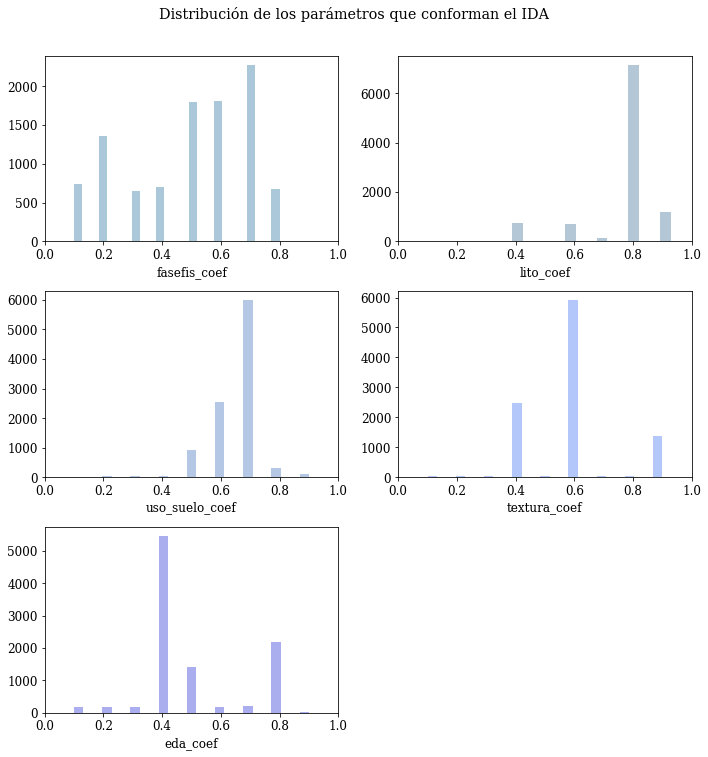

In [8]:
# Histogramas de coeficientes de disponibilidad
coef_list = [w for w in disponibilidad.columns if "coef" in w]
colors = ['#2C77A2', '#45759D','#4575C0','#4575F3','#2C33D5']
plt.figure(figsize=(10,10))
for i,word in enumerate(coef_list):
    plt.subplot(3,2,i+1)
    sns.distplot(
        disponibilidad[word],
        kde=False,
        color=colors[i],
        bins=25)
    plt.xlim(0,1)
    plt.suptitle("Distribución de los parámetros que conforman el IDA", y=1.05)
plt.tight_layout()
plt.show()

In [9]:
# Primer índice
disponibilidad['ida1'] = (disponibilidad.fasefis.apply(fasefis_coef)*
             disponibilidad.lito.apply(lito_coef)*
             disponibilidad.uso_suelo.apply(uso_suelo_coef)*
             disponibilidad.textura.apply(textura_coef)*
             disponibilidad.eda.apply(eda_coef))

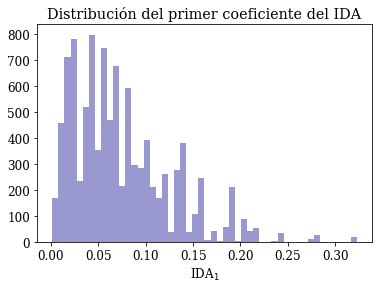

In [10]:
# Distribución del primer índice
sns.distplot(disponibilidad['ida1'], kde=False, bins=50, color="#00008B")
plt.title('Distribución del primer coeficiente del IDA')
plt.xlabel("IDA$_{1}$")
plt.show()

In [11]:
# Lectura de dorma de méxico:
geo_data = gpd.read_file("./destdv250k_2gw.shx")


In [12]:
# Realización de visualización geográfica
# geo_data.boundary.plot(linewidth=.7, color="black", figsize=(15, 10))
# sc = plt.scatter(disponibilidad.longitud,
#                  disponibilidad.latitud, 
#                  c=disponibilidad.ida1, 
#                  s=5, 
#                  vmin=0.0, 
#                  vmax=1.0)

# # Lectura de imagen (rosa de vientos)
# im =  Image.open("./image-formats/rosa-de-vientos3.png")
# im.thumbnail((120, 120), Image.ANTIALIAS)
# plt.text(-117.55,17.9, "N",)
# plt.figimage(im, 40, 30)

# # Agregar barra de color
# plt.colorbar(sc, fraction=0.027, pad=0.04)
# plt.title("Representación geográfica del IDA$_{1}$", fontsize=20)
# plt.show()

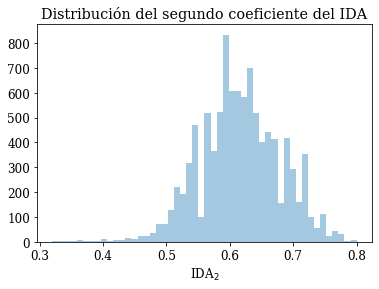

In [13]:
# Promedio ponderado
disponibilidad['ida2'] = (
    0.10*disponibilidad.fasefis.apply(fasefis_coef)+
    0.15*disponibilidad.lito.apply(lito_coef)+
    0.40*disponibilidad.uso_suelo.apply(uso_suelo_coef)+
    0.15*disponibilidad.textura.apply(textura_coef)+
    0.20*disponibilidad.eda.apply(eda_coef)
)

# Distribución de coeficiente 2
sns.distplot(disponibilidad['ida2'], kde=False)
plt.title('Distribución del segundo coeficiente del IDA')
plt.xlabel("IDA$_{2}$")
plt.show()

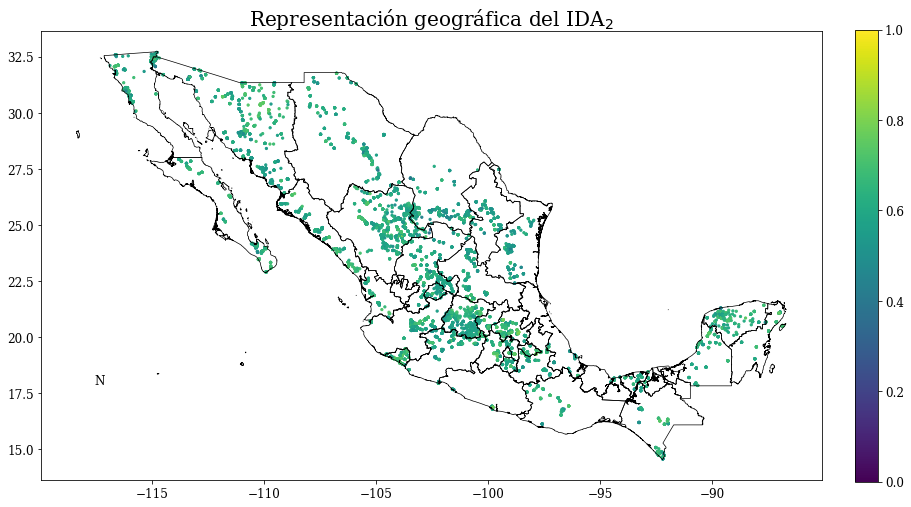

In [14]:
# Representación geográfica de IDA2
geo_data.boundary.plot(linewidth=.7, color="black", figsize=(15, 10))
sc = plt.scatter(disponibilidad.longitud,
                 disponibilidad.latitud, 
                 c=disponibilidad.ida2, 
                 s=5, 
                 vmin=0.0, 
                 vmax=1.0)
plt.text(-117.55,17.9, "N",)
#plt.figimage(im, 40, 30)
plt.colorbar(sc, fraction=0.027, pad=0.04)
plt.title("Representación geográfica del IDA$_{2}$", fontsize=20)
plt.show()

In [15]:
# Librería para hacer clusters
from sklearn.cluster import KMeans

In [16]:
# Obtención de columnas
coefs = [col for col in disponibilidad.columns if (('coef' in col))] + ['ida2','ida1']

In [17]:
# Número de clusters
clusters = 100
y_pred = KMeans(n_clusters=clusters).fit_predict(disponibilidad[coefs])
disponibilidad['ans'] = y_pred

In [18]:
# Generación de coeficientes a través de los grupos generados
v = (disponibilidad.groupby("ans")
     .mean()[['ida1','ida2']].mean(axis=1)
     .sort_values()
     .reset_index().reset_index())
v['index']=v['index']/clusters
v.columns = ['IDA','ans','C']
v = v[['ans', 'IDA']]

In [19]:
# Unión de ambos dataset
disponibilidad2 = disponibilidad.merge(v, on='ans')

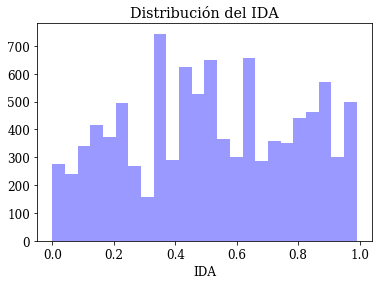

In [20]:
# Distribución final del IDA
sns.distplot(disponibilidad2['IDA'], kde=False, color="blue")
plt.title('Distribución del IDA')
plt.xlabel("IDA")
plt.show()

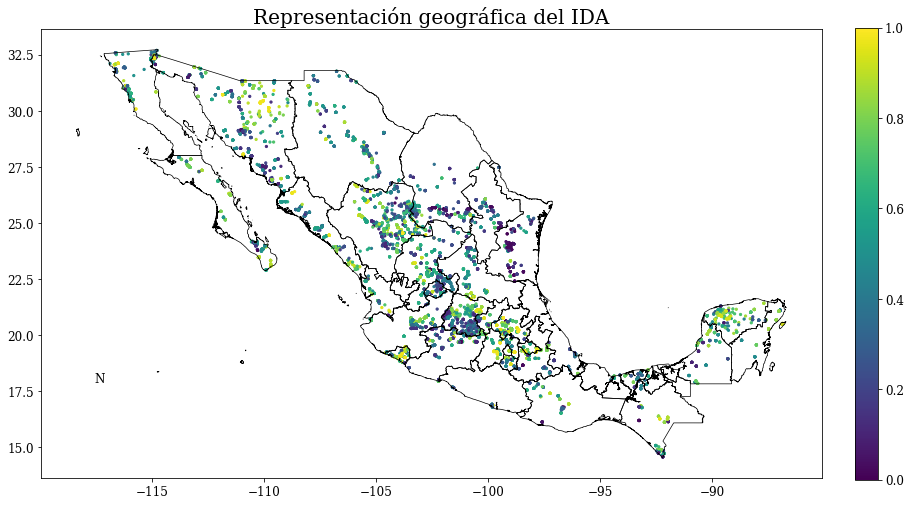

In [21]:
# Representación geográfica del IDA
geo_data.boundary.plot(linewidth=.7, color="black", figsize=(15, 10))
sc = plt.scatter(disponibilidad2.longitud,
                 disponibilidad2.latitud, 
                 c=disponibilidad2.IDA, 
                 s=5, 
                 vmin=0.0, 
                 vmax=1.0)
plt.text(-117.55,17.9, "N",)
#plt.figimage(im, 40, 30)
plt.colorbar(sc, fraction=0.027, pad=0.04)
plt.title("Representación geográfica del IDA", fontsize=20)
plt.show()

In [22]:
# Inclusión del IDA al conjunto de datos principal
non_wanted_list = ['latitud','longitud','eda', 'uso_suelo','textura','lito','fasefis']
data2 = data.merge(disponibilidad2.drop(non_wanted_list, axis=1), on='clave_monitoreo')
data2 = data2.drop(['fasefis_coef',
            'lito_coef',
            'uso_suelo_coef',
            'textura_coef',
            'eda_coef',
            'ida1',
            'ida2',
            'ans'
           ],
           axis=1)

data2.to_csv('./primary_dataset_v2.csv')

In [23]:
# dataset
data

,clave_monitoreo,clave_sitio,nombre_sitio,organismo_cuenca,estado,municipio,cuerpo_agua,tipo_cuerpo_agua,subtipo_cuerpo_agua,año,...,wind_speed,daily_ozone,daily_precip_intensity_max_time,daily_precip_type,daily_pressure,daily_summary,daily_wind_gust,daily_wind_gust_time,ozone,wind_gust
0,dlagu19-021212,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2012,...,4.12,244.222222,1.355499e+09,NaN,1015.634444,NaN,NaN,1.355844e+09,240.885556,NaN
1,dlagu19-260513,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2013,...,2.57,243.487778,1.371001e+09,NaN,1006.926667,NaN,NaN,1.369195e+09,243.524444,NaN
2,dlagu19-270714,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2014,...,4.12,243.222222,1.404127e+09,NaN,1014.604444,NaN,NaN,1.405455e+09,242.664444,NaN
3,dlagu19-190415,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2015,...,6.70,243.134444,1.431031e+09,NaN,1012.682222,NaN,NaN,1.429337e+09,243.055556,NaN
4,dlagu19-140216,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2016,...,1.50,249.963333,1.457445e+09,NaN,1020.975556,NaN,NaN,1.456508e+09,245.844444,NaN
5,dlagu19-090717,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2017,...,0.00,242.382222,1.498432e+09,NaN,1013.722222,NaN,NaN,1.499877e+09,241.582222,NaN
6,dlagu19-110318,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2018,...,3.10,244.488889,1.520013e+09,NaN,1012.618889,NaN,NaN,1.520438e+09,242.156667,NaN
7,dlagu19-021218,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2018,...,2.51,240.900000,1.543381e+09,rain,1018.000000,Despejado durante el día.,3.76,1.543381e+09,237.000000,2.65
8,dlagu19-160619,dlagu19,pozo paso blanco,lerma santiago pacífico,aguascalientes,jesús maría,acuífero valle de aguascalientes,subterráneo,pozo,2019,...,3.52,277.600000,1.560308e+09,rain,1017.800000,Parcialmente nublado durante el día.,14.30,1.560234e+09,278.500000,3.61
9,dlagu1m1-251112,dlagu1m1,pozo de la comunidad de los duron,lerma santiago pacífico,aguascalientes,aguascalientes,acuífero el llano,subterráneo,pozo,2012,...,5.15,242.435556,1.355292e+09,NaN,1014.454444,NaN,NaN,1.355326e+09,240.106667,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x212dfcc0e80>,
 'caps': [<matplotlib.lines.Line2D at 0x212dfcce5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212dfcc0d30>],
 'medians': [<matplotlib.lines.Line2D at 0x212dfccecc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x212dfcda080>],
 'means': []}

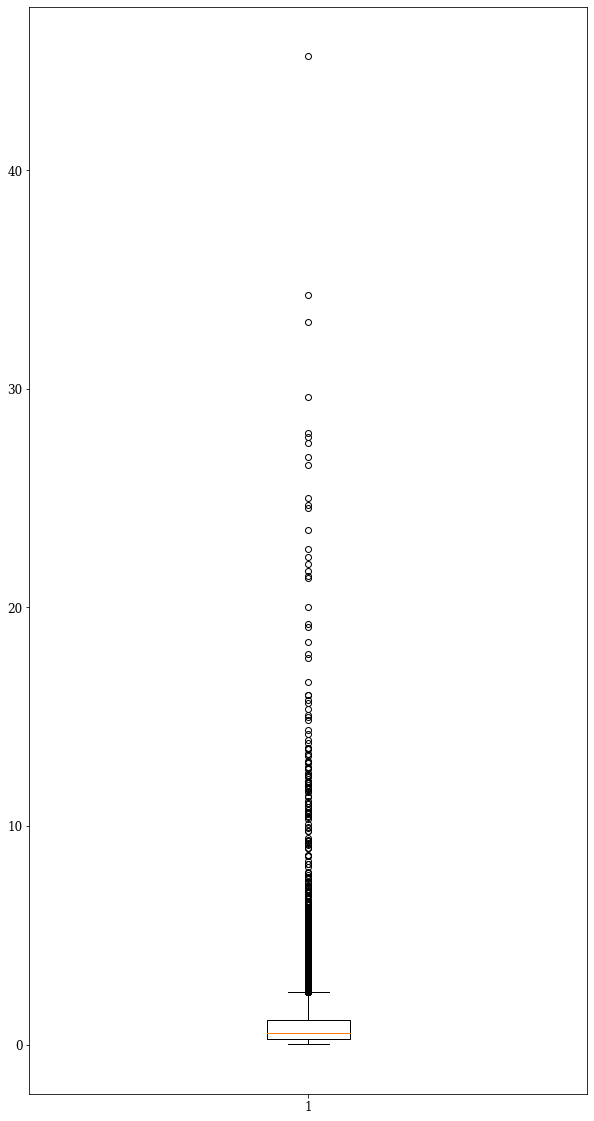

In [34]:
plt.figure(figsize=(10,20))
plt.boxplot(data["fluoruros_tot"],notch=None)

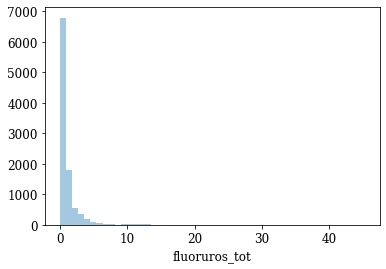

In [29]:
sns.distplot(data["fluoruros_tot"],kde = False)

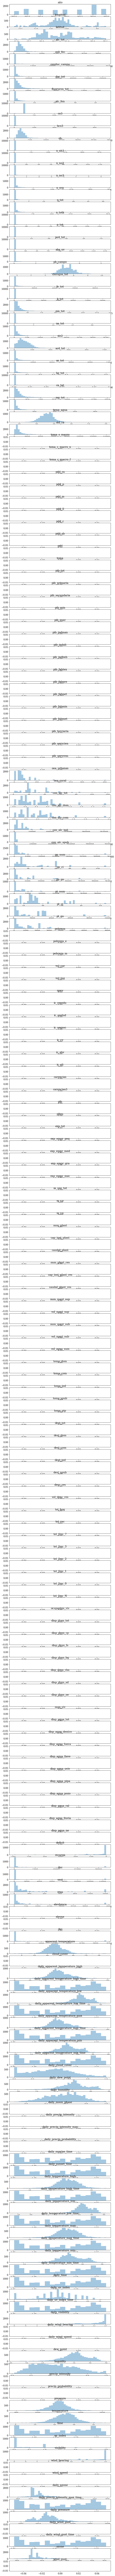

In [54]:
#Variables númericas con describe.
column_i = data.describe().columns

plt.figure(figsize = (10,260))

for i, cl in enumerate (column_i):
    try:
        plt.subplot(len(column_i),1,i+1)
        plt.title(f"{cl}")
        sns.distplot(data[cl], kde = False)
    except: pass